Notebook for using IDC.py to reproduce some of the figures in "Analytical evaluation of the interdigital electrodes capacitance for a multi-layered structure" by Igreja and Dias 2004.

In [3]:
import numpy as np
import mwop.IDC as IDC
import matplotlib.pyplot as plt

Reproduction of figure 6 in Igreja and Dias

(10.0, 70.0)

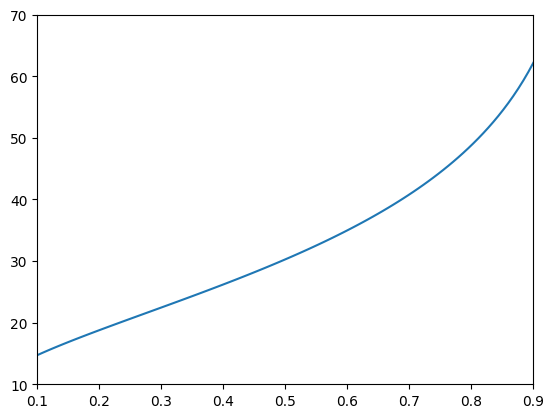

In [4]:
geometry = {}
geometry["length"] = 2e-2
geometry["gap"] = 5
geometry["width"] = 5
geometry["Nfingers"] = 54

substrate = {}
substrate["layer 1"] = {"ep_r":5.4,"thickness":np.infty}

superstrate = {}
superstrate["layer 1"] = {"ep_r":1,"thickness":np.infty}

eta = np.linspace(0.1,0.9,100)
capacitance = np.zeros(len(eta))
for ii,val in enumerate(eta):
    geometry["gap"] = (geometry["width"] - val*geometry["width"])/val
    capacitance[ii] = IDC.IDC_total_cap(geometry,substrate,superstrate)

plt.plot(eta,capacitance*1e12)
plt.xlim(0.1,0.9)
plt.ylim(10,70)

reproduction of figure 7 in Igreja and Dias

(20.0, 160.0)

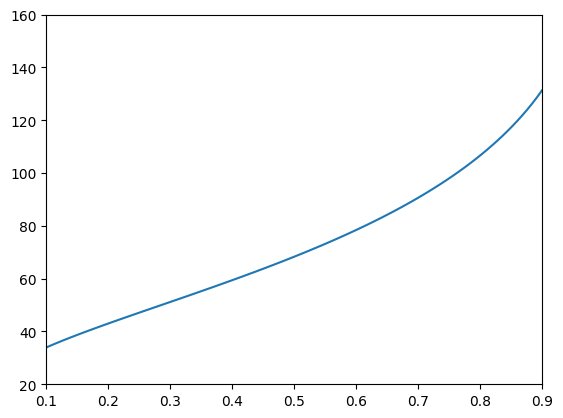

In [5]:
geometry = {}
geometry["length"] = 2e-2
geometry["gap"] = 5
geometry["width"] = 5
geometry["Nfingers"] = 100

substrate = {}
substrate["layer 1"] = {"ep_r":3.15,"thickness":np.infty}

superstrate = {}
superstrate["layer 1"] = {"ep_r":5,"thickness":5}
superstrate["layer 2"] = {"ep_r":1,"thickness":np.infty}

eta = np.linspace(0.1,0.9,100)
capacitance = np.zeros(len(eta))
for ii,val in enumerate(eta):
    geometry["gap"] = (geometry["width"] - val*geometry["width"])/val
    wavelength = 2*(geometry["gap"] + geometry["width"])
    superstrate["layer 1"]["thickness"] = 0.25 * wavelength
    capacitance[ii] = IDC.IDC_total_cap(geometry,substrate,superstrate)

plt.plot(eta,capacitance*1e12)
plt.xlim(0.1,0.9)
plt.ylim(20,160)

reproduction of Fig 8 in Rui and Dias

(30.0, 90.0)

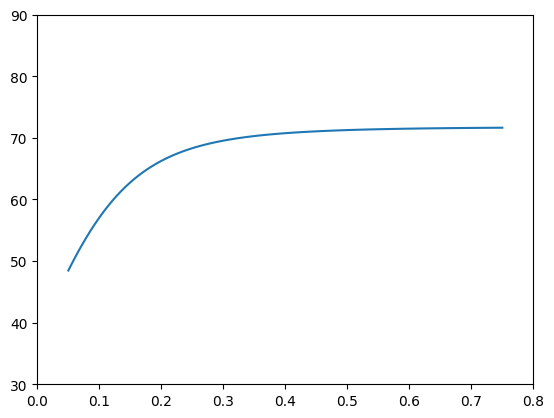

In [6]:
geometry = {}
geometry["length"] = 2e-2
geometry["gap"] = 5
geometry["width"] = 5
geometry["Nfingers"] = 100

substrate = {}
substrate["layer 1"] = {"ep_r":3.15,"thickness":np.infty}

superstrate = {}
superstrate["layer 1"] = {"ep_r":5,"thickness":5}
superstrate["layer 2"] = {"ep_r":1,"thickness":np.infty}

wavelength = 2*(geometry["gap"] + geometry["width"])

r = np.linspace(0.05,0.75,100)
capacitance = np.zeros(len(r))
for ii,val in enumerate(r):
    superstrate["layer 1"]["thickness"] = val * wavelength
    capacitance[ii] = IDC.IDC_total_cap(geometry,substrate,superstrate)
    
plt.plot(r,capacitance*1e12)
plt.xlim(0,0.8)
plt.ylim(30,90)

In [7]:
c=IDC.coupling_cap_halfwave(500,50,1000,5e9,n=1)
print(c*1e15)

11.2837916709551257389615890312154517168810125865799771368817144342128493688298682897348732040421472688605669581272341470337986298965232573273097904003553798658567527411919687952070492870043594514242316049154564044110901705434643324441692661622279902552690897204613647538183749031749323170260213279671554399875466832071559775233348815246607876043270120328724339247010091662506389375891331257665163104324886909773140637975486176355636589677895021700183691706844326356517867050366602404924512444744989454006779486252859931885270085660898072663160787539197121631867565844111476584757646315846621152392955493650618034312361611904445923526493071808017068858972500578947843283623854861954845113975759155809974963827387447938414572126684953593989721917752608726745291175750308616186883947696657698275835072379132701848269785061766078993081168211450829654964695034948401879397668335542977117833566747899718316330027537197737240879282581457385792761475465346223685735760423104973243794381779361506299024029491

## exploring capacitance of IDCs on SOI substrate

In [8]:
geometry = {}
geometry["length"] = 50e-6
geometry["gap"] = 100e-6
geometry["width"] = 100e-6
geometry["Nfingers"] = 6

substrate = {}
substrate["layer 1"] = {"ep_r":11.68,"thickness":220e-9}
substrate["layer 2"] = {"ep_r":3.9,"thickness":3.5e-6}
substrate["layer 3"] = {"ep_r":11.68,"thickness":np.infty}

superstrate = {}
superstrate["layer 1"] = {"ep_r":1,"thickness":np.infty}

c = IDC.IDC_total_cap(geometry,substrate,superstrate)
print(c*1e12)
Qc = IDC.coupling_Q_halfwave(50,50,c,5e9)
print(Qc)



0.01467358347337151349766845905370424094722922624254599604837934567872672892320590497893630321560203551596111167536318666228549322768500400508490906761470298391355404686184130051492221049741502604794907728429342301960799903281732505282417429508515342480789657039791420280968920044396569491496376700461483454248540700676187475584758217171357274813788766128797056786080677155110535107834405332171759880475841754019649712489796374033067921625377234753950043981934592499830445132841471937632069647418425379245465212331487903346488901635385689664510822401618416247020785820933473807374996585362235829118199325010677449620538773670375017666500782253978549171887160851413388349205390904807707432754139446624389154882492633971004974439421727074723472535479672895102351114861731934155872926936931289447702291749979803382394403002693288726209466890487416618690774543668325600502356485756733558891317385720519433544496350667351031194993851103722239044133799992067412477360935209377066857612919459356230819349772

In [9]:
print(IDC.fin_interior_cap(1,0.5,0.001,1))

0.00000000000007058432785380168539212306953698789816848609452531382444898059452488409877214579071659902907766510907656676463174908812264882455158119225040556458783937820179775701542368799200707795658235852316848366078367369967994080771126077700814895448750765121900513809092444863120222304257485904843797925551607602644078438495972788660757133947968404435303185059302427840516350790878820952225903399611156793618060294153506713784851652129589449314481750769106124950672646955126956939293613377569364428918020327847843776191813695505461946000210366818788332899661258382148965594468249535018176225806667988749364427074884079285445745774088502581184596474453372997213431328745135554528770698195060299467991028716722115607633319956210815129802043033736375833807837373611247929360910216757245213594501252262927495949371055474475537782654432532145613339764116743283950770958349120863407515045144735722360586334247964383591205058022730561141208092605084782654836241328932245699866050734245173155684909464646

In [10]:
import mpmath as mpm
print(mpm.mp)
print(mpm.ellipk(mpm.mpf(0.9999999999999999)))

Mpmath settings:
  mp.prec = 3325              [default: 53]
  mp.dps = 1000               [default: 15]
  mp.trap_complex = False     [default: False]
19.75469464595844183893846085548831741946042096907951569828331199307117686157265898575773771086190792825697840432368780257946714297943598765808078010504555538595617177503711820328658079188568513740437952658314818658923274469488864334183529498598142889501622802810015667489511060052265314851645735061563770704170707656986837270054600375848559566146853164478081268274098606398177232116600470847892994744916206367413167896559314018215608878696674829498968124215279407831689392307299066213117957339001542520923048192726723075152219926368670073127988235995143967494230709308893361804838879736069085327631664655632664508120178855893975277414344211851149824425664439924441453991979642979518250964288102786199769455200312456995254248544066229499770510960445864245011502389188873830219865735042675295927130213519738385370985639904542582996691277543584330792